In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix,  roc_auc_score, cohen_kappa_score, roc_curve, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.feature_selection import SelectFromModel
scaler = StandardScaler()
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing dataset
df = pd.read_csv("weatherAUS.csv")

In [3]:
#checking dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
#replace no and yes with 0 and 1
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

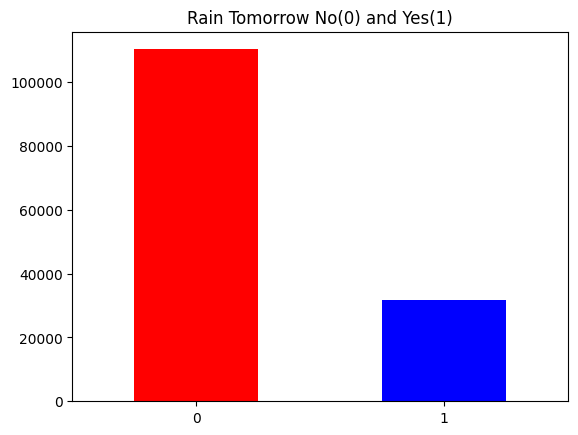

In [7]:
#looking at how much data that we have for rain tomorrow
df['RainTomorrow'].value_counts().plot.bar(color= ['red','blue'], rot=0)
plt.title('Rain Tomorrow No(0) and Yes(1)')
plt.show()

Rain Tomorrow appears to be imbalanced so we're going to sample each equally.

In [8]:
#oversampling smaller group
df_no = df[df.RainTomorrow == 0]
df_yes = df[df.RainTomorrow == 1]
sample = resample(df_yes, replace=True, n_samples=len(df_no), random_state=123)
sampled_df = pd.concat([df_no, sample])

In [9]:
#verified that it's now equal in number of values in each field.
sampled_df['RainTomorrow'].value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

In [10]:
#looking at percentages for missing data
total = sampled_df.isnull().sum().sort_values(ascending=False)
percent = (sampled_df.isnull().sum()/sampled_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing)

                Total   Percent
Sunshine       104831  0.475140
Evaporation     95411  0.432444
Cloud3pm        85614  0.388040
Cloud9am        81339  0.368664
Pressure3pm     21746  0.098562
Pressure9am     21728  0.098481
WindGustDir     15491  0.070212
WindGustSpeed   15354  0.069591
WindDir9am      14728  0.066754
WindDir3pm       6440  0.029189
Humidity3pm      6031  0.027335
Temp3pm          4558  0.020659
WindSpeed3pm     4353  0.019730
Humidity9am      3171  0.014372
RainToday        3124  0.014159
Rainfall         3124  0.014159
WindSpeed9am     2206  0.009999
Temp9am          1653  0.007492
MinTemp          1082  0.004904
MaxTemp           471  0.002135
RISK_MM             0  0.000000
Date                0  0.000000
Location            0  0.000000
RainTomorrow        0  0.000000


There are about 40% of missing values from multiple integar values. This is too big of a number to replace or delete. 

In [11]:
#looking at which columns are objects
sampled_df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Out of all of these objects, Date and Location don't have any null values. So, will only need to fix the null values in the rest.  

In [12]:
#replaing all null values that are objects with the mode. 
for column in sampled_df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]:
    mode = sampled_df[column].mode()
    sampled_df[column] = sampled_df[column].fillna(mode)

In [13]:
#verifying that the nans of the three objects that we filled in were fixed. 
sampled_df.isna().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir       15491
WindGustSpeed     15354
WindDir9am        14728
WindDir3pm         6440
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [14]:
#using label enocoding
labels = {}
for col in sampled_df.select_dtypes(include=['object']).columns:
    labels[col] = LabelEncoder()
    sampled_df[col] = labels[col].fit_transform(sampled_df[col])

In [15]:
# impute missing values
imputed_df = sampled_df.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_df.iloc[:, :] = mice_imputer.fit_transform(sampled_df)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\brean\AppData\Local\Temp\ipykernel_24028\4290745656.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_df.iloc[:, :] = mice_imputer.fit_transform(sampled_df)


In [16]:
imputed_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.778984,7.313969,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.873302,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.617630,11.450027,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.745847,2.667158,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.798940,12.242987,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.827239,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,6.028280,11.609252,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.295906,2.173363,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.787325,5.801185,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


In [17]:
#verifying no more nan values!
imputed_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [18]:
#finding outliers
Q1 = imputed_df.quantile(0.25)
Q3 = imputed_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.122835
Sunshine            5.953421
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.689995
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [19]:
# Removing outliers from dataset
imputed_df = imputed_df[~((imputed_df < (Q1 - 1.5 * IQR)) |(imputed_df > (Q3 + 1.5 * IQR))).any(axis=1)]
imputed_df.shape

(156814, 24)

Text(0.5, 1.0, 'Heatmap Correlation')

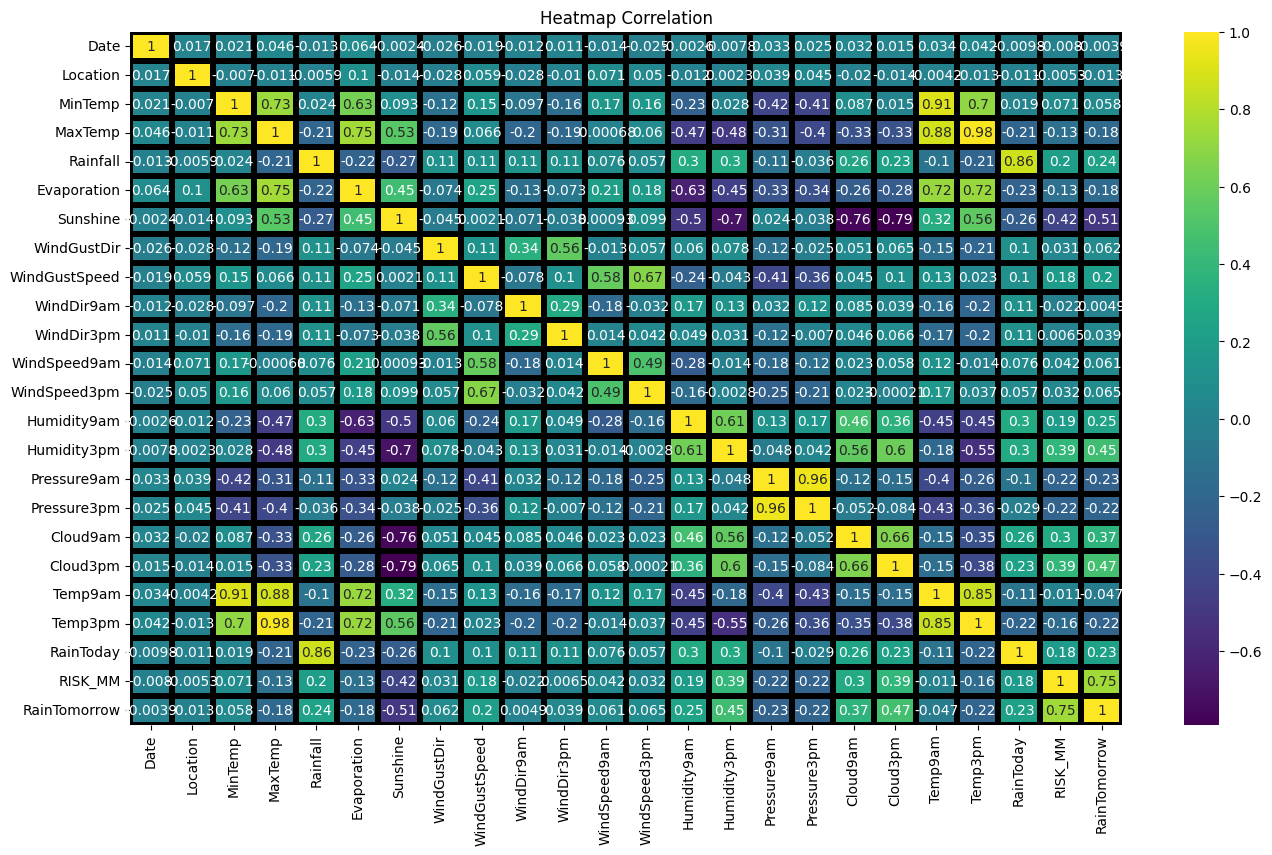

In [20]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(imputed_df.corr(), annot = True, linewidths=4, linecolor='k', cmap='viridis')
plt.title('Heatmap Correlation')

The biggest correlation with raintoday is rainfall. The biggest correlation between raintomorrow is Sunshine, Risk_mm, cloud3pm, and Humidity3pm. However, will still run feature selection to find the most important features. Also, Risk_mm is already the calculated risk of precipitation so that will need to get excluded from our data. 

In [21]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(imputed_df)
modified_df = pd.DataFrame(r_scaler.transform(imputed_df), index=imputed_df.index, columns=imputed_df.columns)
modified_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.435812,0.574183,0.498742,0.8125,0.521127,0.8125,...,0.219048,0.245714,0.298295,0.866788,0.420306,0.506775,0.530612,0.219493,0.000000,0.0
1,0.115575,0.041667,0.375350,0.568966,0.373125,0.564274,0.738977,0.8750,0.521127,0.3750,...,0.249085,0.328571,0.318182,0.336643,0.230034,0.514905,0.594388,0.219493,0.000000,0.0
2,0.115866,0.041667,0.529412,0.583744,0.373125,0.698239,0.785034,0.9375,0.549296,0.8125,...,0.299146,0.242857,0.343750,0.343543,0.172493,0.617886,0.566327,0.219493,0.000000,0.0
3,0.116157,0.041667,0.425770,0.640394,0.373125,0.589494,0.748225,0.2500,0.239437,0.5625,...,0.158975,0.528571,0.460227,0.298503,0.187445,0.539295,0.650510,0.219493,0.076923,0.0
4,0.116448,0.041667,0.658263,0.746305,0.477604,0.636110,0.410875,0.8125,0.478873,0.0625,...,0.329182,0.334286,0.267045,0.782021,0.689974,0.531165,0.732143,0.219493,0.015385,0.0


In [22]:
# Feature Importance
x = modified_df.loc[:,modified_df.columns!='RainTomorrow']
y = modified_df[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(x, y)
x_new = selector.transform(x)
print(x.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


Accoridng to the feature selection, these are the most important features for determining Rain tomorrow: 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'

This below graph was created in Tableau using the original dataset, before any changes were made. The numbers represent sunshine, while the size of the boxes represent the likelhood of rain (RISK_MM). As we can see, as sunshine today decreases, the risk for rain the next day increases. 

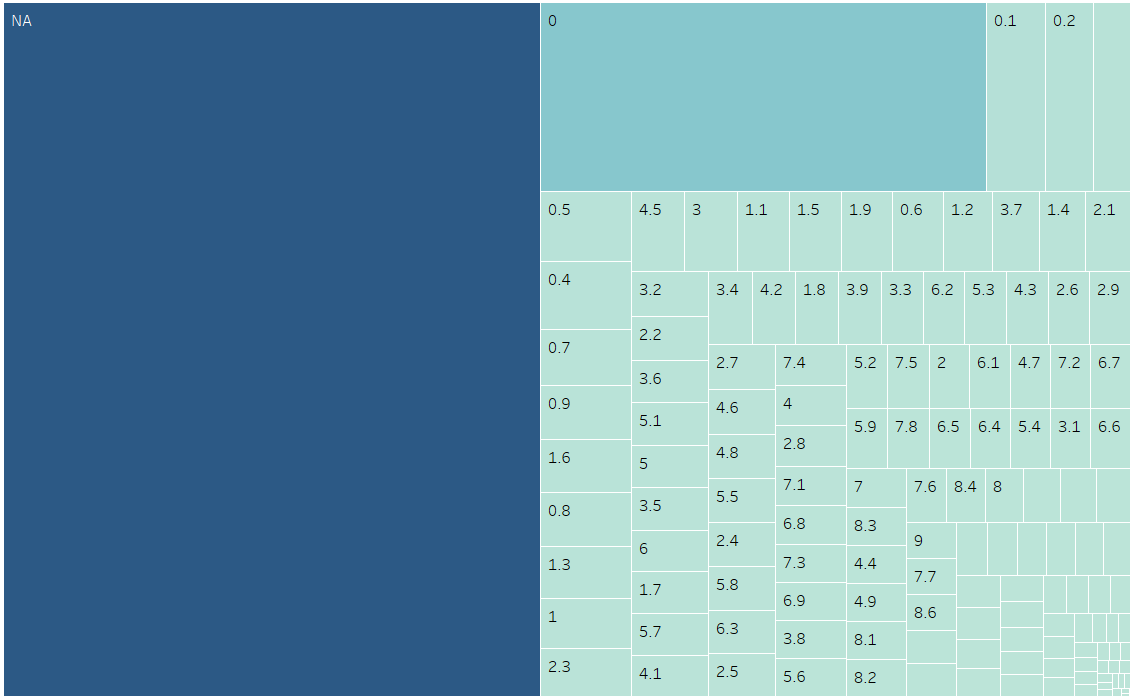

In [ ]:
#plotting the feature selection
sns.pairplot(data = imputed_df, vars = ('Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'), hue = 'RainTomorrow')

In [ ]:
#looking at the correlation between sunshine, humidity, and rain tomorrow. 
sns.scatterplot(data=imputed_df, x="Humidity3pm", y="Sunshine", hue="RainTomorrow")

In [ ]:
#editing x so that it doesn't include risk_mm since it's a calculated field. 
x = modified_df.drop(columns=['RISK_MM', 'RainTomorrow'])

In [ ]:
#verifying that the fields were removed. 
x.head()

In [ ]:
#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)

In [ ]:
#scale and fit the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#classifiying decision tree and fitting it
dtc = DecisionTreeClassifier()
dtc_y = dtc.fit(x_train,y_train)

In [ ]:
dtc_pred = dtc_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,dtc_pred)))
print('Precision Score : ' + str(precision_score(y_test,dtc_pred)))
print('Recall Score : ' + str(recall_score(y_test,dtc_pred)))
print('F1 Score : ' + str(f1_score(y_test,dtc_pred)))

In [ ]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,dtc_pred)))

In [ ]:
#classifying random forest tree and fitting it
rfc= RandomForestClassifier(n_estimators = 100, random_state=42)
rfc_y = rfc.fit(x_train,y_train) 

In [ ]:
rfc_pred = rfc_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,rfc_pred)))
print('Precision Score : ' + str(precision_score(y_test,rfc_pred)))
print('Recall Score : ' + str(recall_score(y_test,rfc_pred)))
print('F1 Score : ' + str(f1_score(y_test,rfc_pred)))

In [ ]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,rfc_pred)))

In [ ]:
#SVC classiying and fitting
svc = SVC(random_state=42)
svc_y = svc.fit(x_train,y_train)

In [ ]:
svc_pred = svc_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,svc_pred)))
print('Precision Score : ' + str(precision_score(y_test,svc_pred)))
print('Recall Score : ' + str(recall_score(y_test,svc_pred)))
print('F1 Score : ' + str(f1_score(y_test,svc_pred)))

In [ ]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,svc_pred)))

In [ ]:
#logistic regression classifying and fittnig
lr = LogisticRegression()
lr_y = lr.fit(x_train,y_train)

In [ ]:
lr_pred = lr_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,lr_pred)))
print('Precision Score : ' + str(precision_score(y_test,lr_pred)))
print('Recall Score : ' + str(recall_score(y_test,lr_pred)))
print('F1 Score : ' + str(f1_score(y_test,lr_pred)))

In [ ]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,lr_pred)))

In [ ]:
#knn classifying and fittnig
knn = KNeighborsClassifier()
knn_y = knn.fit(x_train,y_train)

In [ ]:
#knn accuracy
kscore = knn.score(x_test,y_test)
print("KNeighbors accuracy", kscore)

In [ ]:
knn_pred = knn_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,knn_pred)))
print('Precision Score : ' + str(precision_score(y_test,knn_pred)))
print('Recall Score : ' + str(recall_score(y_test,knn_pred)))
print('F1 Score : ' + str(f1_score(y_test,knn_pred)))

In [ ]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,lr_pred)))